# Pre stuff
Importing libraries, loading and visualising data.

In [ ]:
import mne

from mne.decoding import Vectorizer

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.model_selection import train_test_split

In [87]:
# Folder & files containing the data:
data_path = 'data/'
data_file = '817_1_PDDys_ODDBALL_Clean_curated'

filename = data_path + data_file

# We read the EEG epochs:
epochs = mne.read_epochs(filename + '.fif')

This filename (data/817_1_PDDys_ODDBALL_Clean_curated.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
Reading data/817_1_PDDys_ODDBALL_Clean_curated.fif ...
    Found the data of interest:
        t =    -100.00 ...     500.00 ms
        0 CTF compensation matrices available
189 matching events found
No baseline correction applied
189 matching events found
No baseline correction applied
Not setting metadata


<ipython-input-87-1ca795fdfcdb>:8: RuntimeWarning: This filename (data/817_1_PDDys_ODDBALL_Clean_curated.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(filename + '.fif')


0 projection items activated


In [88]:
epochs.info

<Info | 18 non-empty fields
    bads : list | 0 items
    ch_names : list | Fp1, Fz, F3, F7, FC5, FC1, C3, T7, CP5, ...
    chs : list | 60 items (EEG: 60)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    dig : list | 60 items
    events : list | 0 items
    file_id : dict | 4 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 250.0 Hz
    meas_id : dict | 4 items
    nchan : int | 60
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 500.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    experimenter : NoneType
    gantry_angle : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_date : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneType
    xplotter_layout : NoneTyp

In [ ]:
# The data can be accessed via:
epochs._data

In [ ]:
epochs.plot

In [81]:
# set number of filter parameters
num_filter = 7

In [89]:
# save original data multiple times to apply different filters to it without altering the original data
from copy import deepcopy
import copy
multi_epochs = []
for i in range(num_filter):
    multi_epochs.append(copy.deepcopy(epochs))
print(len(multi_epochs))

7


In [ ]:
events = epochs.events
print('Events = ')
print(events)

In [ ]:
epochs.event_id

# Preprocessing

## Analysing the data (Max)

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-96-0346c8c3a9a7>:16: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  myEpochs.average().plot();


Setting up band-pass filter from 0.1 - 60 Hz
l_trans_bandwidth chosen to be 0.1 Hz
h_trans_bandwidth chosen to be 15.0 Hz
Filter length of 16501 samples (33.002 sec) selected
filter_length (16501) is longer than the signal (301), distortion is likely. Reduce filter length or filter a longer signal.


<ipython-input-96-0346c8c3a9a7>:17: RuntimeWarning: filter_length (16501) is longer than the signal (301), distortion is likely. Reduce filter length or filter a longer signal.
  myEpochs.filter(l_freq = 0.1, h_freq = 60)


time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-96-0346c8c3a9a7>:18: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  myEpochs.average().plot();


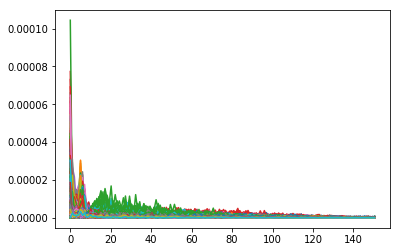

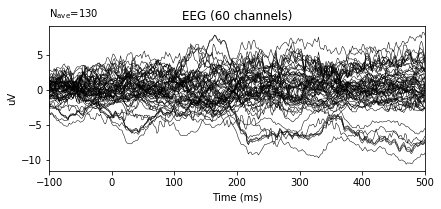

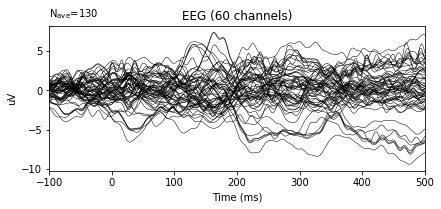

In [96]:
# filter the epoched data:
import numpy as np
%matplotlib inline
myEpochs = copy.deepcopy(epochs['Standard'])
from scipy.fftpack import fft
N = len(myEpochs._data[0,0,:])
T = 1.0 / N
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
import matplotlib.pyplot as plt
for jj in myEpochs._data:
    for ii in jj:
        plt.plot(xf, 2.0/N * np.abs(fft(ii)[0:N//2]))
plt.grid
plt.show()

myEpochs.average().plot();
myEpochs.filter(l_freq = 0.1, h_freq = 60)
myEpochs.average().plot();

## Filtering the data (Julie and Georgi)

Filtering set 0 / 7
Setting up band-pass filter from 0.1 - 20 Hz
l_trans_bandwidth chosen to be 0.1 Hz
h_trans_bandwidth chosen to be 5.0 Hz
Filter length of 16501 samples (33.002 sec) selected
filter_length (16501) is longer than the signal (301), distortion is likely. Reduce filter length or filter a longer signal.


<ipython-input-90-eac2018864c5>:6: RuntimeWarning: filter_length (16501) is longer than the signal (301), distortion is likely. Reduce filter length or filter a longer signal.
  multi_epochs[i].filter(l_freq = l_freqs[i], h_freq = h_freqs[i])


time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-90-eac2018864c5>:7: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  multi_epochs[i].average().plot()


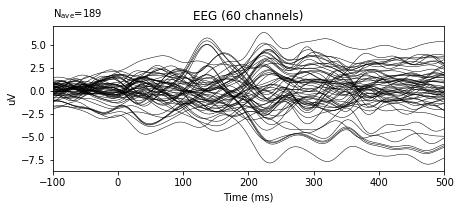

Filtering set 1 / 7
Setting up band-pass filter from 20 - 30 Hz
l_trans_bandwidth chosen to be 5.0 Hz
h_trans_bandwidth chosen to be 7.5 Hz
Filter length of 331 samples (0.662 sec) selected
filter_length (331) is longer than the signal (301), distortion is likely. Reduce filter length or filter a longer signal.


<ipython-input-90-eac2018864c5>:6: RuntimeWarning: filter_length (331) is longer than the signal (301), distortion is likely. Reduce filter length or filter a longer signal.
  multi_epochs[i].filter(l_freq = l_freqs[i], h_freq = h_freqs[i])


time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-90-eac2018864c5>:7: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  multi_epochs[i].average().plot()


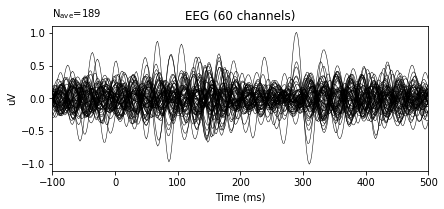

Filtering set 2 / 7
Setting up band-pass filter from 30 - 40 Hz
l_trans_bandwidth chosen to be 7.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 221 samples (0.442 sec) selected
time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-90-eac2018864c5>:7: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  multi_epochs[i].average().plot()


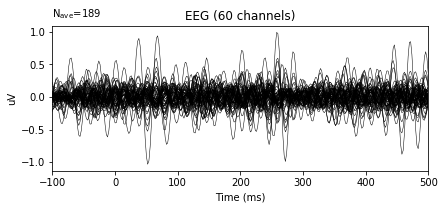

Filtering set 3 / 7
Setting up band-pass filter from 40 - 50 Hz
l_trans_bandwidth chosen to be 10.0 Hz
h_trans_bandwidth chosen to be 12.5 Hz
Filter length of 165 samples (0.330 sec) selected
time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-90-eac2018864c5>:7: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  multi_epochs[i].average().plot()


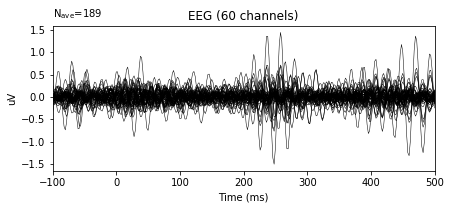

Filtering set 4 / 7
Setting up band-pass filter from 90 - 1e+02 Hz
l_trans_bandwidth chosen to be 22.5 Hz
h_trans_bandwidth chosen to be 25.0 Hz
Filter length of 73 samples (0.146 sec) selected
time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-90-eac2018864c5>:7: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  multi_epochs[i].average().plot()


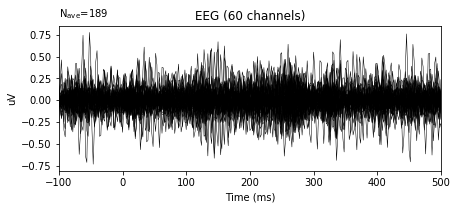

Filtering set 5 / 7
Setting up band-pass filter from 0.1 - 10 Hz
l_trans_bandwidth chosen to be 0.1 Hz
h_trans_bandwidth chosen to be 2.5 Hz
Filter length of 16501 samples (33.002 sec) selected
filter_length (16501) is longer than the signal (301), distortion is likely. Reduce filter length or filter a longer signal.


<ipython-input-90-eac2018864c5>:6: RuntimeWarning: filter_length (16501) is longer than the signal (301), distortion is likely. Reduce filter length or filter a longer signal.
  multi_epochs[i].filter(l_freq = l_freqs[i], h_freq = h_freqs[i])


time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-90-eac2018864c5>:7: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  multi_epochs[i].average().plot()


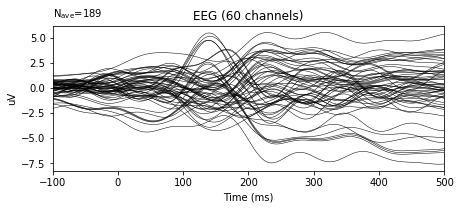

Filtering set 6 / 7
Setting up band-pass filter from 1e+02 - 1.5e+02 Hz
l_trans_bandwidth chosen to be 25.0 Hz
h_trans_bandwidth chosen to be 37.5 Hz
Filter length of 67 samples (0.134 sec) selected
time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-90-eac2018864c5>:7: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  multi_epochs[i].average().plot()


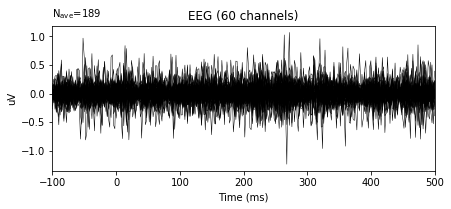

In [90]:
l_freqs = [0.1, 20, 30, 40, 90, 0.1, 100]
h_freqs = [20, 30, 40, 50, 100, 10, 150]

for i, epoch_i in enumerate(multi_epochs):
    print('Filtering set', i+1, '/', num_filter)
    multi_epochs[i].filter(l_freq = l_freqs[i], h_freq = h_freqs[i])
    multi_epochs[i].average().plot()

# Applying Machine Learning

In [91]:
# get the data
all_data = [] # create empty list
for i, epochs_i in enumerate(multi_epochs):
    all_data.append(multi_epochs[i]._data) # append new data object to list

# get the labels
labels = epochs.events[:,-1]

if (all_data[0].all==epochs._data.all) or (all_data[0].all==all_data[1].all):
    print('Shit!')
print('Length of data:')
print(len(all_data))
#print('Data:')
#print(all_data)
print('Length of labels:')
print(len(labels))

Length of data:
7
Length of labels:
189


In [92]:
# create pipeline to execute multiple steps in a row
clf = [make_pipeline(Vectorizer(), StandardScaler(), 
                     svm.SVC(kernel='linear',C=1))] * num_filter

In [93]:
for i, data in enumerate(all_data):
    data_train, data_test, labels_train, labels_test = train_test_split(data, # x values
                                                                        labels, # y values
                                                                        test_size=0.4, 
                                                                        random_state=0)
    print('Step', i+1, '/', num_filter)
    clf[i].fit(data_train, labels_train) # apply pipelined steps
    print('Score:', clf[i].score(data_test, labels_test))

Step 1 / 7
Score: 0.8552631578947368
Step 2 / 7
Score: 0.631578947368421
Step 3 / 7
Score: 0.5789473684210527
Step 4 / 7
Score: 0.618421052631579
Step 5 / 7
Score: 0.6578947368421053
Step 6 / 7
Score: 0.8289473684210527
Step 7 / 7
Score: 0.6842105263157895
